In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/prastyo-sentiment_all.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())
print(data.columns)

  Yuppp Karena UTANG Pemerintah jg UTANG Bangsa INDONESIA Berarti jg HUTANG Nya AKU Sebagai Captain COVID 19  Kalo Orang Lain Itu TERSERAH Mereka..but AKU ya ini..apapun KEADAAN Pemerintah MEREKA TETAP BALA TENTARA ALLAH  SWT Berarti SAHABAT Baik Nya Aku.. https://twitter.com/AsiahAh12603321/status/1248503226225156098Ã‚Â Ã¢â‚¬Â¦  \
0  Yuks.. kawal kebijakan pemerintah jangan sampa...                                                                                                                                                                                                                                                                                         
1  Yukk sama-sama bahu membahu membantuu pemerint...                                                                                                                                                                                                                                                                                        

In [ ]:
# Rename columns for easier access if needed
# Check column names and adjust accordingly
data.columns = ['text', 'sentiment']
print(data.columns)

Index(['text', 'sentiment'], dtype='object')


In [ ]:
# Check unique values in the sentiment column
print(data['sentiment'].unique())

['pos' 'neg' 'neu']


In [ ]:
# Map sentiment values if they are in a different format
data['sentiment'] = data['sentiment'].map({'pos': 1, 'neg': 0})

# Drop any rows with NaN values (if mapping failed)
data = data.dropna(subset=['sentiment'])

  Yuppp Karena UTANG Pemerintah jg UTANG Bangsa INDONESIA Berarti jg HUTANG Nya AKU Sebagai Captain COVID 19  Kalo Orang Lain Itu TERSERAH Mereka..but AKU ya ini..apapun KEADAAN Pemerintah MEREKA TETAP BALA TENTARA ALLAH  SWT Berarti SAHABAT Baik Nya Aku.. https://twitter.com/AsiahAh12603321/status/1248503226225156098Ã‚Â Ã¢â‚¬Â¦  \
0  Yuks.. kawal kebijakan pemerintah jangan sampa...                                                                                                                                                                                                                                                                                         
1  Yukk sama-sama bahu membahu membantuu pemerint...                                                                                                                                                                                                                                                                                        

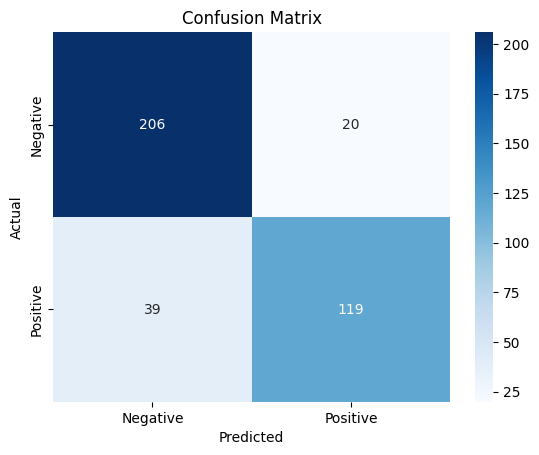

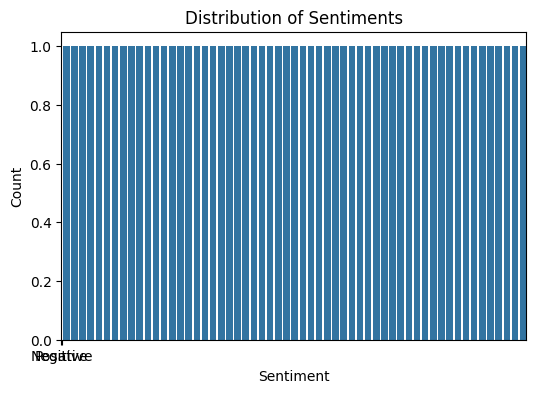

In [ ]:
# Install necessary libraries if needed
# !pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/content/prastyo-sentiment_all.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column names
print(data.head())
print(data.columns)

# Rename columns for easier access
data.columns = ['text', 'sentiment']

# Check unique values in the sentiment column
print(data['sentiment'].unique())

# Map sentiment values
data['sentiment'] = data['sentiment'].map({'pos': 1, 'neg': 0})

# Drop any rows with NaN values
data = data.dropna(subset=['sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Transform text data to feature vectors
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotting the distribution of sentiments
plt.figure(figsize=(6,4))
sns.countplot(data['sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()